In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast  
import seaborn as sns

In [4]:
df = pd.read_csv(r'D:\Python\Python course\data_jobs.csv')
dfvg = pd.read_csv(r'D:\Python\Alex\Files\vgsales.csv')

new_columns = ['job', 'fname', 'location', 'via', 'schedule', 'remote','search_location','posted_dt','no_degree','health_ins','country','salrate','salyr','salhr','company','skills','skilltype']
df.columns = new_columns

# data clean up
df['posted_dt'] = pd.to_datetime(df['posted_dt'])                                                                # converting the column from string format to date time format
df['skills'] = df['skills'].apply(lambda gg: ast.literal_eval(gg) if pd.notna(gg) else gg)                       # converts job_skills from sting to list
#df.dropna(subset=['salyr'],inplace=True)

##### prob 2

###### <pre> what is the demand for the top 3 jobs over the year in usa

###### solution

In [5]:
df_2 = df.copy()
df_2 = df[df['country']=='United States']
top3_jobs = df_2['job'].value_counts().head(3).index.to_list()                                                     # getting the indexes of top 3 jobs by count to a list
# df_ind['job_posted_month'] = df_ind['job_posted_date'].dt.month                                                # this will extract month from the given column and create a new column but we need abbrevated name of months not just numbers. hence using below code
df_2['posted_mo'] = df_2['posted_dt'].dt.strftime('%b')                                                          # this will give abbrevated name of months. to know more about similar to %B, go to 'docs.Apython.org/3/library/datetime.html'
df_2 = df_2.pivot_table(index='posted_mo', columns='job',aggfunc='size')
df_2.reset_index(inplace=True)                                                                                   # a) resetting index
df_2['posted_mo_numb'] = pd.to_datetime(df_2['posted_mo'], format='%b').dt.month                                 # b) (watch@ 7:09:22 if didnt understand) creating new column and associate with job_posted_month
df_2.sort_values(by='posted_mo_numb', inplace=True)                                                              # c) sorting
df_2.drop(columns='posted_mo_numb', inplace=True)                                                                # e) deleting
df_2.set_index('posted_mo', inplace=True)
df_2 = df_2[top3_jobs]                                                                                           # 6 filtering top 3 jobs from the table 

df_2

C:\Users\surya\AppData\Local\Temp\ipykernel_21400\1086782238.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['posted_mo'] = df_2['posted_dt'].dt.strftime('%b')                                                          # this will give abbrevated name of months. to know more about similar to %B, go to 'docs.Apython.org/3/library/datetime.html'


job,Data Analyst,Data Scientist,Data Engineer
posted_mo,,,
Jan,8494,6915,2655
Feb,6124,4956,3060
Mar,6218,4779,3183
Apr,6049,4867,2801
May,4993,4377,2976
Jun,5683,4645,2893
Jul,5201,4876,2570
Aug,6634,6318,3269
Sep,4639,4568,3224


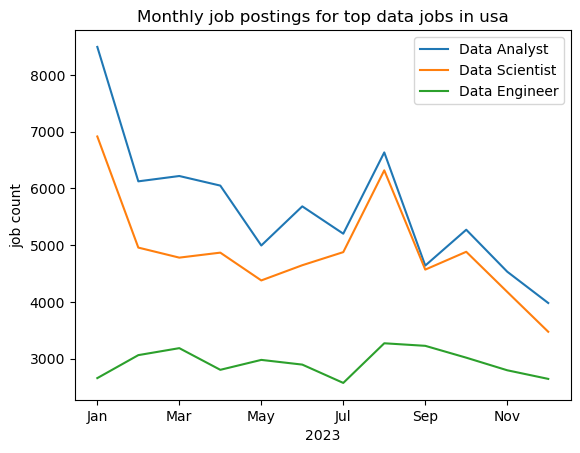

In [6]:
df_2.plot(kind = 'line')                                                                                   
plt.title('Monthly job postings for top data jobs in usa')
plt.xlabel('2023')
plt.ylabel('job count')
plt.legend(loc = 'upper right')
plt.show()    